In [ ]:
C:\projects\research paper\collections\pLessons1

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("C:/projects/research paper/collections/pLessons1/diabetes.csv")

In [4]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isna().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class variable                  0
dtype: int64

In [6]:
data.dtypes

Number of times pregnant          int64
Plasma glucose concentration      int64
Diastolic blood pressure          int64
Triceps skin fold thickness       int64
2-Hour serum insulin              int64
Body mass index                 float64
Diabetes pedigree function      float64
Age                               int64
Class variable                    int64
dtype: object

In [7]:
X = data.iloc[:,:-1] # all the rows, and all the columns except the last
y = data.iloc[:,-1]

In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable, Length: 768, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
accuracies = []
for i in range(10):
    model = Sequential()
    model.add(Dense(1, input_dim=8, activation='sigmoid'))  
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=1500, batch_size=100, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test) # since the 2nd argument in the output for 'model.evaluate(X_test, y_test)'' is an accuracy score
    accuracies.append(accuracy*100)

6/6 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7396


In [11]:
sum(accuracies)/len(accuracies)

75.83333194255829

In [13]:
y_pred = model.predict(X)
y_pred = np.where(y_pred>0.5, 1, 0)

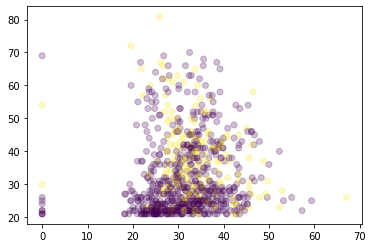

In [14]:
differ = np.abs(y.to_numpy() - y_pred.T)  #(spotting) the correct and incorrect values

fig, ax = plt.subplots()
ax.scatter(x=X['Body mass index'], y=X['Age'], c = differ, alpha = 0.25)  # This is to show where our prediction is stronger